In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv'
happy = pd.read_csv(url) # complete data set
col_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18] # columns of interest
happy_clean = happy.iloc[:,col_range] # subsetting columns of interest
happy_clean.iloc[:,1:] = happy_clean.iloc[:,1:].apply(pd.to_numeric) # changing type of each variable
happy_fin = happy_clean.set_index('Country name') # indexing by country

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Relationships Between Variables Across All Years
Are there any general trends between certain variables that we can look to when exploring 2017's data?

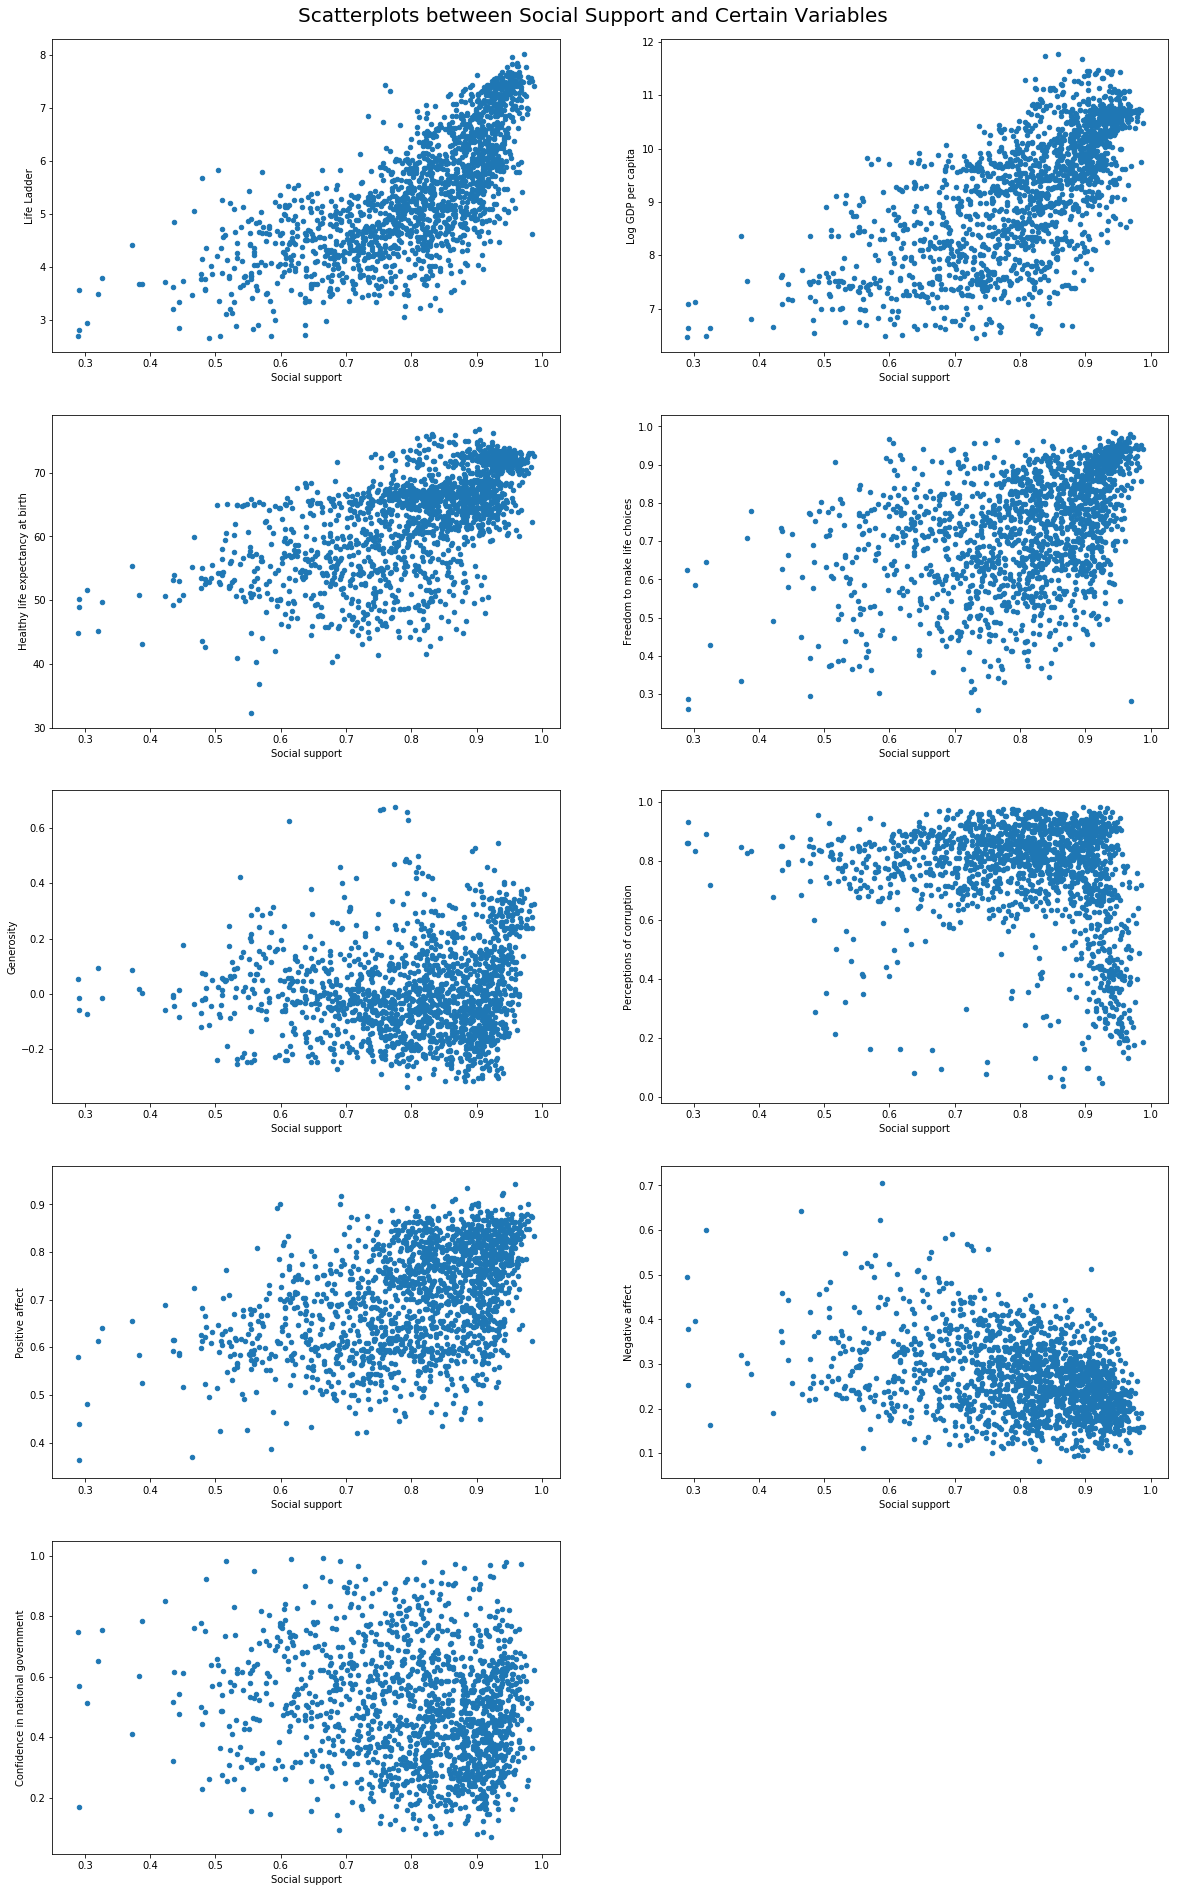

In [106]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,30))
fig.delaxes(axes[4][1])

happy_fin.plot(x="Social support",y="Life Ladder",kind="scatter",ax=axes[0,0])
happy_fin.plot(x="Social support",y="Log GDP per capita",kind="scatter",ax=axes[0,1])
happy_fin.plot(x="Social support",y="Healthy life expectancy at birth",kind="scatter",ax=axes[1,0])
happy_fin.plot(x="Social support",y="Freedom to make life choices",kind="scatter",ax=axes[1,1])
happy_fin.plot(x="Social support",y="Generosity",kind="scatter",ax=axes[2,0])
happy_fin.plot(x="Social support",y="Perceptions of corruption",kind="scatter",ax=axes[2,1])
happy_fin.plot(x="Social support",y="Positive affect",kind="scatter",ax=axes[3,0])
happy_fin.plot(x="Social support",y="Negative affect",kind="scatter",ax=axes[3,1])
happy_fin.plot(x="Social support",y="Confidence in national government",kind="scatter",ax=axes[4,0])
fig.suptitle('Scatterplots between Social Support and Certain Variables',size=20)
fig.subplots_adjust(top=.965)
plt.show()

Social support seems to have relatively strong relationships with Life Ladder, Log GDP per capita, and Healthy life expectancy at birth. Social support seems to have relatively weak relationships with Generosity, Perceptions of corruption, Confidence in national government, and Standard deviation of ladder by country-year.

# Distributions of Variables in 2017
What are the typical values for each variable in 2017? Are the distributions skewed in any way?

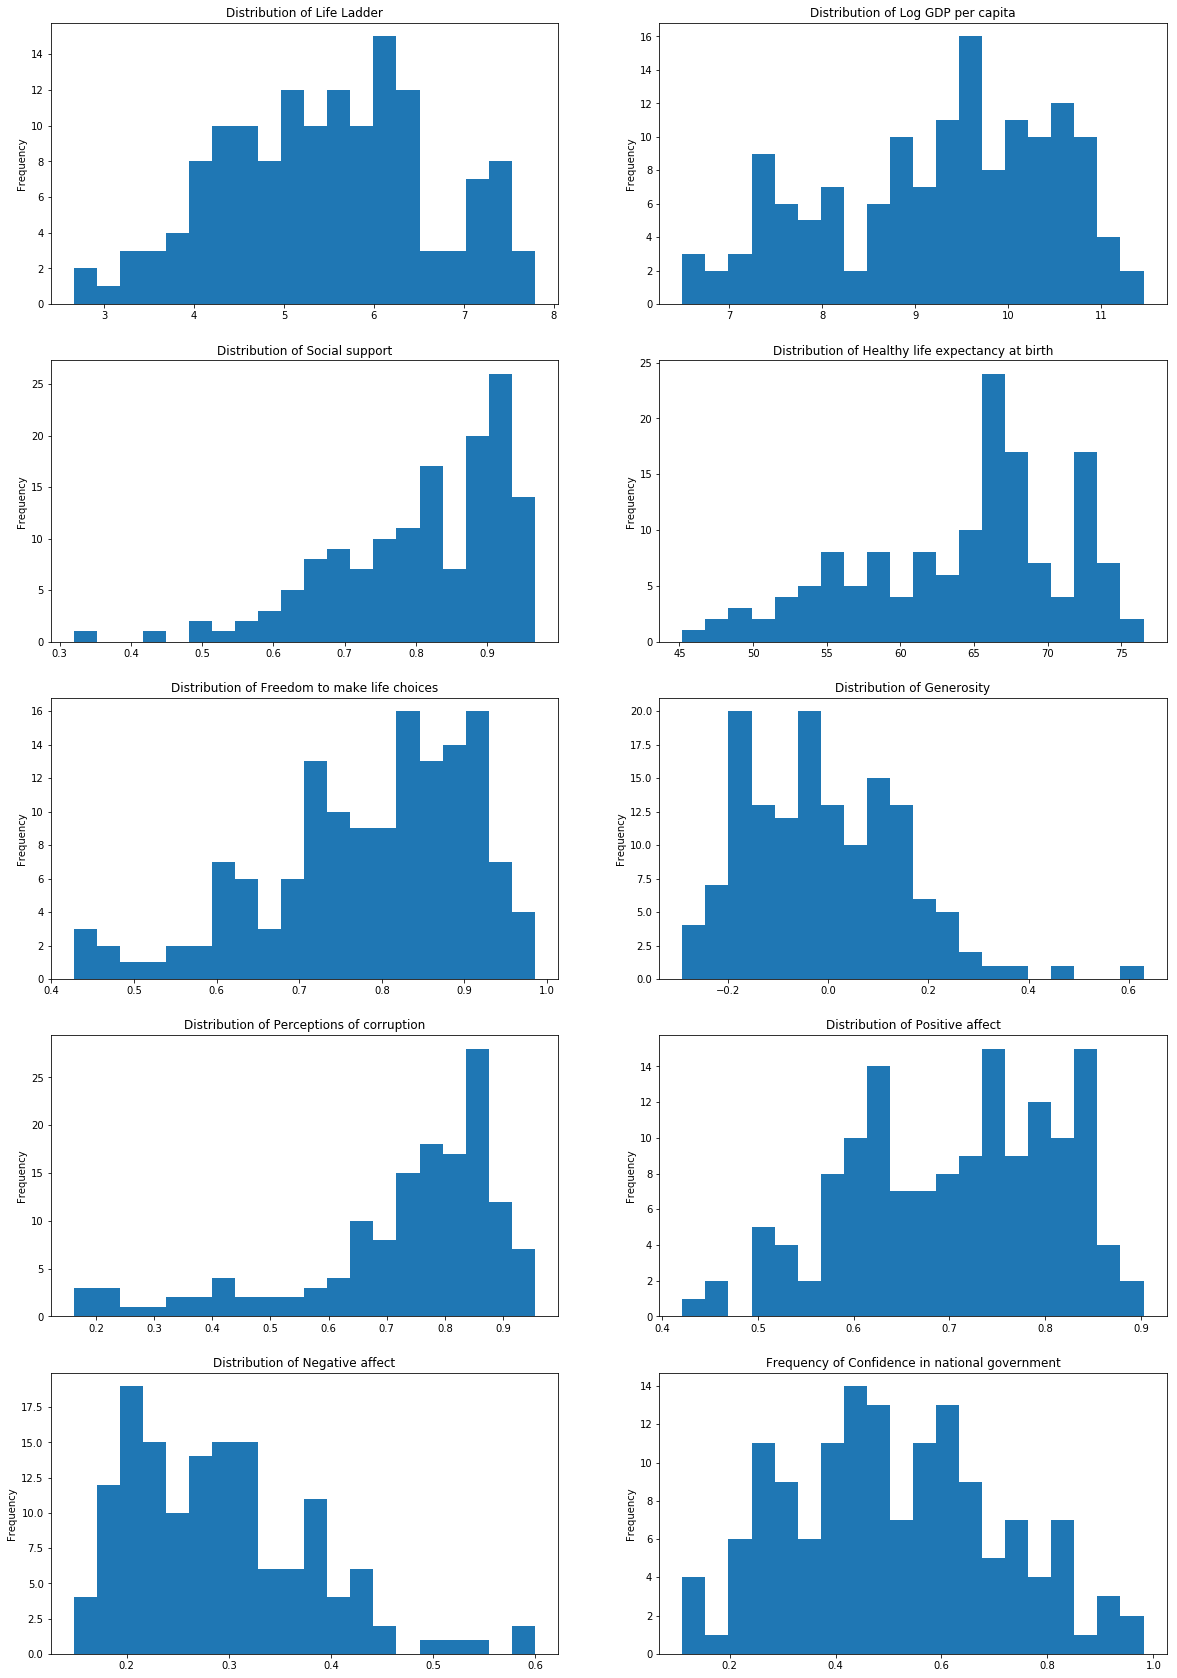

In [109]:
url = 'https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_clean.csv'
happy_2017 = pd.read_csv(url,index_col=0)

fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,30))

happy_2017["Life Ladder"].plot(kind="hist",bins=20,ax=axes[0,0],title="Distribution of Life Ladder")
happy_2017["Log GDP per capita"].plot(kind="hist",bins=20,ax=axes[0,1],title="Distribution of Log GDP per capita")
happy_2017["Social support"].plot(kind="hist",bins=20,ax=axes[1,0],title="Distribution of Social support")
happy_2017["Healthy life expectancy at birth"].plot(kind="hist",bins=20,ax=axes[1,1],title="Distribution of Healthy life expectancy at birth")
happy_2017["Freedom to make life choices"].plot(kind="hist",bins=20,ax=axes[2,0],title="Distribution of Freedom to make life choices")
happy_2017["Generosity"].plot(kind="hist",bins=20,ax=axes[2,1],title="Distribution of Generosity")
happy_2017["Perceptions of corruption"].plot(kind="hist",bins=20,ax=axes[3,0],title="Distribution of Perceptions of corruption")
happy_2017["Positive affect"].plot(kind="hist",bins=20,ax=axes[3,1],title="Distribution of Positive affect")
happy_2017["Negative affect"].plot(kind="hist",bins=20,ax=axes[4,0],title="Distribution of Negative affect")
happy_2017["Confidence in national government"].plot(kind="hist",bins=20,ax=axes[4,1],title="Frequency of Confidence in national government")
plt.show()

Social support, is extremely left skewed, along with Healthy life expectancy at birth, and Freedom to make life choices. Generosity is extremely right skewed.

It's interesting to see that so many countries have extremely high values for Social Support. The distribution for Life Ladder is more normal, with slight left skewness, suggesting that Social Support isn't the only variable that affects it.

# Life Ladder and Social Support
How does Life Ladder differ with high and low Social Support scores?

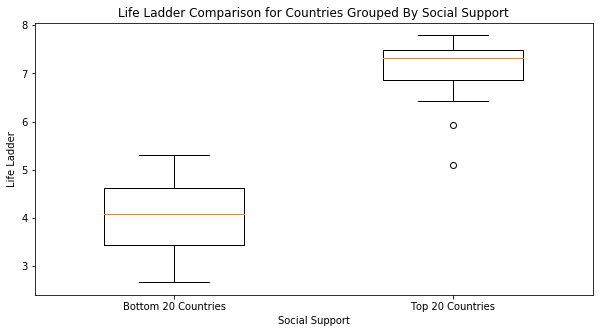

In [186]:
happy_2017_social=happy_2017.sort_values(by=["Social support"]) # sorted from least to most Social Support
social_bottom=happy_2017_social.iloc[:15,]
social_top=happy_2017_social.iloc[-15:,]
plt.figure(figsize=(10,5))
plt.boxplot([social_bottom["Life Ladder"],social_top["Life Ladder"]],widths=0.5)
plt.xticks([1,2],["Bottom 20 Countries","Top 20 Countries"])
plt.ylabel("Life Ladder")
plt.xlabel("Social Support")
plt.title("Life Ladder Comparison for Countries Grouped By Social Support")
plt.show()

In [179]:
social_bottom[["Life Ladder","Social support"]].describe()

,Life Ladder,Social support
count,15.000000,15.000000
mean,4.042647,0.555986
std,0.798326,0.090482
min,2.661718,0.319589
25%,3.446362,0.512178
50%,4.078620,0.582110
75%,4.627611,0.630179
max,5.312483,0.641193


In [180]:
social_top[["Life Ladder","Social support"]].describe()

,Life Ladder,Social support
count,15.000000,15.000000
mean,7.044293,0.946365
std,0.731402,0.010152
min,5.096902,0.933749
25%,6.867911,0.937414
50%,7.327183,0.943482
75%,7.474904,0.951114
max,7.788252,0.966753


Ranked by Social support, the bottom 20 countries have Social support scores ranging from 0.319589 to 0.641193 and Life Ladder scores ranging from 2.661718 to 5.312483. The top 20 countries have Social support scores ranging from 0.933749 to 0.966753 and Life Ladder scores ranging from 5.096902 to 7.788252. 

Interestingly, both subsets have about the same range in Life Ladder scores (bottom 20 = 2.650765, top 20 = 2.69135), while their range of Social support scores differ greatly (bottom 20 = 0.321604, top 20 = 0.033004). This suggests that for countries with high scores of Social support, Social support has a weaker relationship with Life Ladder scores, while for countries with low scores of Social support, Social support has a stronger relationsihp with Life Ladder scores. 

# Outliers

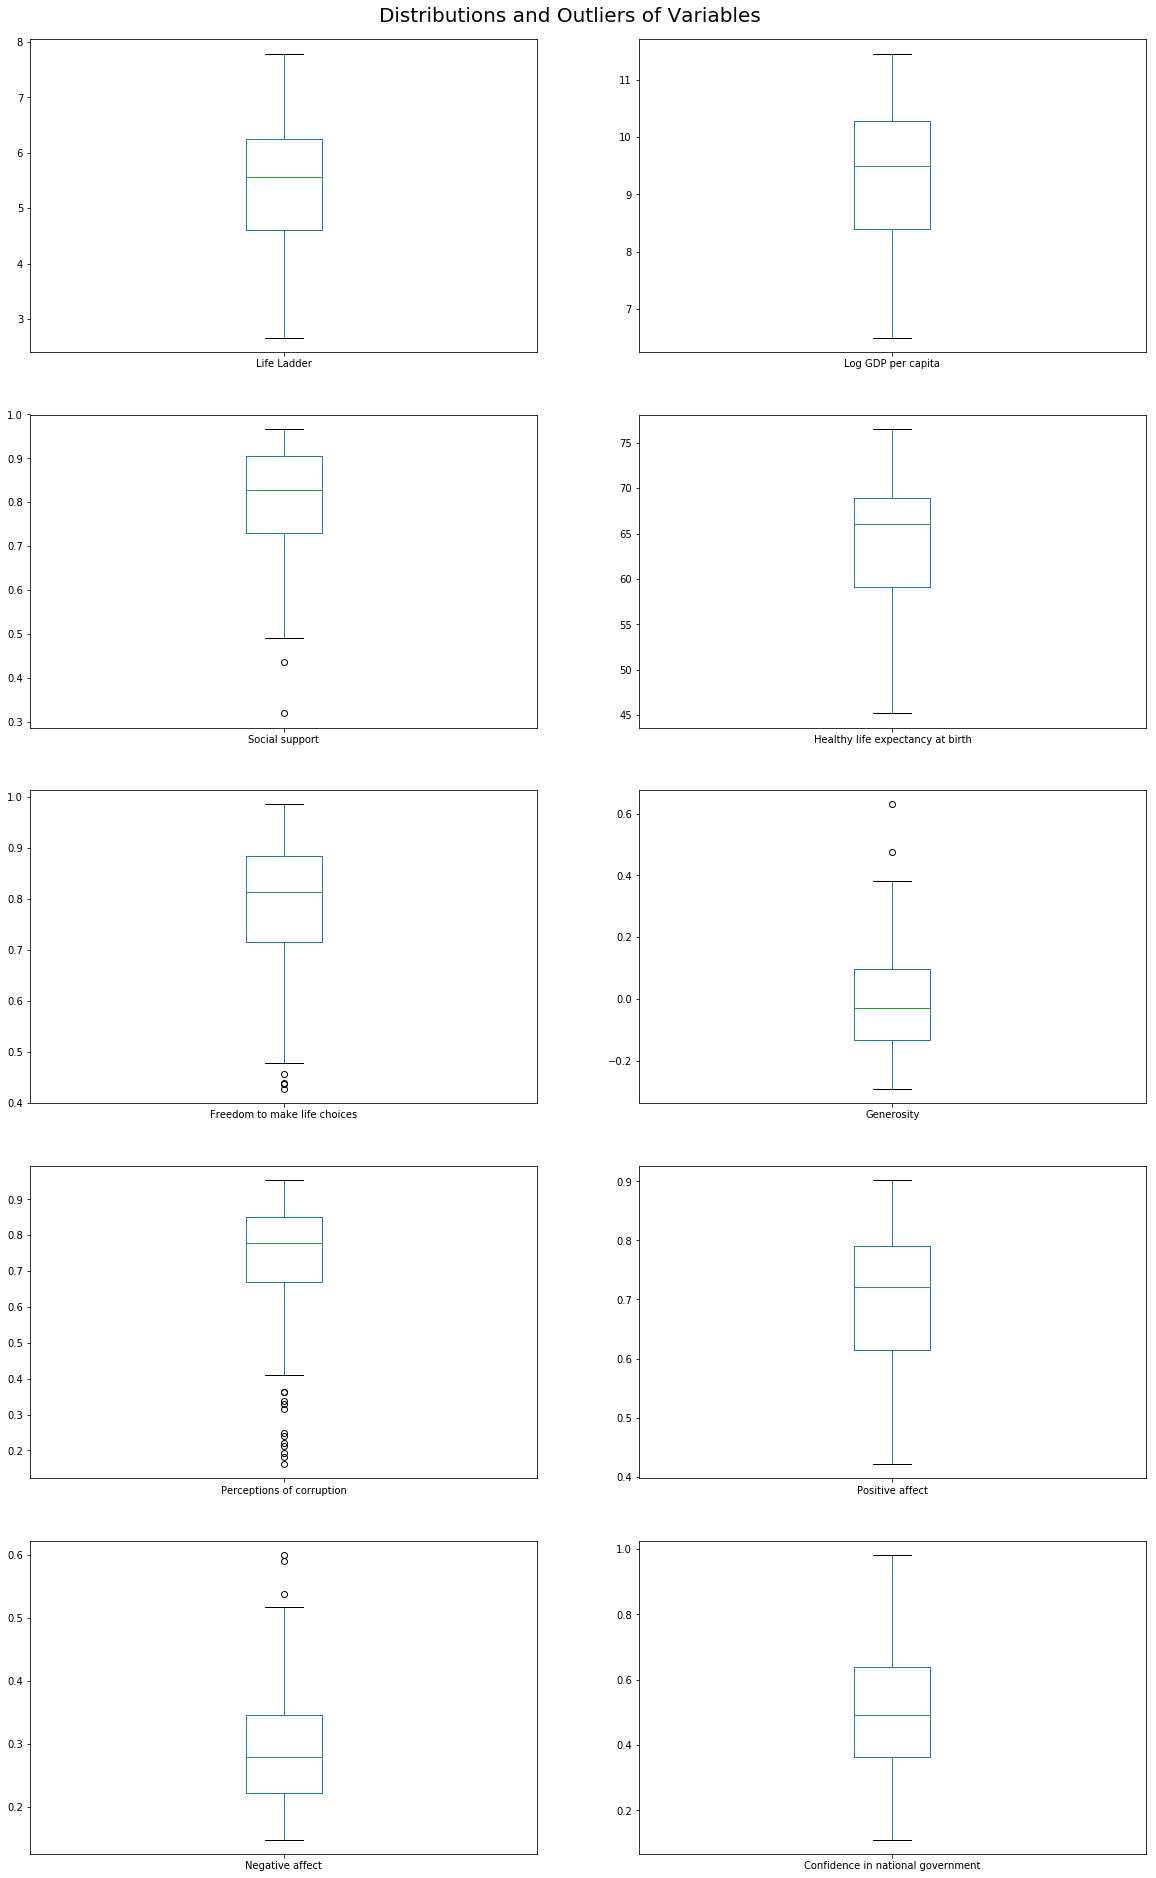

In [105]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,30))

happy_2017["Life Ladder"].plot(kind="box",ax=axes[0,0])
happy_2017["Log GDP per capita"].plot(kind="box",ax=axes[0,1])
happy_2017["Social support"].plot(kind="box",ax=axes[1,0])
happy_2017["Healthy life expectancy at birth"].plot(kind="box",ax=axes[1,1])
happy_2017["Freedom to make life choices"].plot(kind="box",ax=axes[2,0])
happy_2017["Generosity"].plot(kind="box",ax=axes[2,1])
happy_2017["Perceptions of corruption"].plot(kind="box",ax=axes[3,0])
happy_2017["Positive affect"].plot(kind="box",ax=axes[3,1])
happy_2017["Negative affect"].plot(kind="box",ax=axes[4,0])
happy_2017["Confidence in national government"].plot(kind="box",ax=axes[4,1])
fig.suptitle('Distributions and Outliers of Variables',size=20)
fig.subplots_adjust(top=.965)
plt.show()

__Social support__  

In [214]:
IQR=happy_2017["Social support"].describe()[6]-happy_2017["Social support"].describe()[4]
happy_2017[happy_2017["Social support"]<happy_2017["Social support"].describe()[4]-1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
152,Benin,2017,4.853181,7.632515,0.435879,53.900002,0.726808,-0.042811,0.767235,0.614722,0.457920,0.615089,0.211716,-0.571934,2.998127,0.617765,0.577070
275,Central African Republic,2017,3.475862,6.494117,0.319589,45.200001,0.645252,0.093754,0.889566,0.613865,0.599335,0.650285,-1.523122,-1.538733,2.807074,0.807591,0.715371


- The _Central African Republic_ has many human rights issues, such as extrajudicial executions, torture, beatings, mob violence, female genital mutilation, human trafficking, and marriage of underage girls, which could contribute to its low social support score.  
- _Benin_ faces many issues, such as low literacy rates, lack of clean water, crop failure, environmental destruction, along with corruption and poor governance, which could contribute to its low social support score.

__Freedom to make life choices__

In [215]:
IQR=happy_2017["Freedom to make life choices"].describe()[6]-happy_2017["Freedom to make life choices"].describe()[4]
happy_2017[happy_2017["Freedom to make life choices"]<happy_2017["Freedom to make life choices"].describe()[4]-1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808,1.454051,0.546283,0.286599
27,Algeria,2017,5.248912,9.540639,0.806754,65.699997,0.436670,-0.191522,0.699774,0.641980,0.288710,0.324916,-0.927691,-0.816839,2.039765,0.388607,0.527556
567,Greece,2017,5.148242,10.109460,0.752900,72.199997,0.438300,-0.291227,0.872239,0.602939,0.332831,0.139881,0.291475,0.124455,2.411631,0.468438,0.346706
1398,South Sudan,2017,2.816622,7.313220,0.556823,51.000000,0.456011,0.053269,0.761270,0.585602,0.517364,0.461551,-2.138769,-2.018497,2.736838,0.971674,0.703008


- _Afghanistan_ has a history of human rights abuses and violations committed by its security forces and intelligence agency, possibly explaining its low ranking
- In _Algeria_, elected officials have little say in government matters; rather, unelected civilian and military individuals rule the country and get to decide things like who is president
- _Greece_'s long-term debt crisis and economic problems have likely made its population feel uncertain and helpless about its future
- _South Sudan_ has been in an ongoing civil war since 2013; about 400000 people have been killed and 4 million people have been displace. This long-term crisis probably makes the population feel helpless and unable to make decisions

__Generosity__

In [220]:
IQR=happy_2017["Generosity"].describe()[6]-happy_2017["Generosity"].describe()[4]
happy_2017[happy_2017["Generosity"]>happy_2017["Generosity"].describe()[6]+1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
665,Indonesia,2017,5.098402,9.322663,0.795589,61.900002,0.865026,0.475461,0.900416,0.862584,0.319172,0.825765,-0.190968,-0.166090,2.325179,0.456060,0.449708
1046,Myanmar,2017,4.154342,8.629020,0.795184,58.700001,0.886012,0.629577,0.618822,0.745647,0.282286,0.824177,-0.974803,-0.848311,2.233866,0.537718,0.424162


- _Myanmar_ is ranked highest in generosity, likely because 87.9% of the population practices Theravāda Buddhism. This religion encourages its followers to donate money to those living a monastery life, and small, frequent acts of giving are normal.  
- _Indonesia_ is ranked second highest in generosity, probably because 87.2% of the population practice Islam. This religion also encourages its followers to donate money, a practice called infaq.

__Perceptions of corruption__

In [222]:
IQR=happy_2017["Perceptions of corruption"].describe()[6]-happy_2017["Perceptions of corruption"].describe()[4]
happy_2017[happy_2017["Perceptions of corruption"]<happy_2017["Perceptions of corruption"].describe()[4]-1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
269,Canada,2017,7.414868,10.692345,0.933749,73.400002,0.945145,0.155016,0.362034,0.862773,0.217981,0.652736,1.295284,1.866528,1.603364,0.216236,0.601349
408,Denmark,2017,7.593702,10.751125,0.952100,72.099998,0.955416,0.152028,0.181148,0.823667,0.205775,0.572353,1.190443,1.868863,1.668074,0.219665,0.630813
494,Finland,2017,7.788252,10.611172,0.963826,71.800003,0.962199,-0.005696,0.192413,0.787137,0.176066,0.597539,1.311007,1.999900,1.416398,0.181863,0.425614
698,Ireland,2017,7.060155,11.117440,0.943482,72.199997,0.905341,0.210760,0.337085,0.833389,0.212784,0.603800,1.155644,1.463198,1.761334,0.249475,0.367454
894,Luxembourg,2017,7.061381,11.454002,0.905436,72.599998,0.902822,0.039555,0.330174,0.765817,0.184467,0.738922,1.428659,1.774406,1.424476,0.201728,0.292350
1075,Netherlands,2017,7.458965,10.788753,0.936501,72.199997,0.920320,0.244597,0.363134,0.852185,0.184520,0.669554,1.242933,1.899130,1.318480,0.176764,0.441935
1087,New Zealand,2017,7.327183,10.493656,0.954921,73.000000,0.942279,0.289706,0.221887,0.817431,0.171717,0.609015,1.575009,2.004671,1.650336,0.225235,0.446442
1138,Norway,2017,7.578745,11.079062,0.950128,73.099998,0.953017,0.218105,0.249711,0.849100,0.202914,0.717160,1.422639,2.013394,1.621726,0.213983,0.328113
1279,Rwanda,2017,3.108374,7.525215,0.516550,60.500000,0.908115,0.050675,0.213757,0.762161,0.358310,0.981398,-0.541283,0.292253,2.128731,0.684838,0.714648
1339,Singapore,2017,6.378438,11.356686,0.897350,76.500000,0.926128,0.125963,0.161791,0.800114,0.179325,0.926998,0.708122,2.069170,1.418072,0.222323,0.564910


- _Canada_
- _Denmark_
- _Finland_
- _Ireland_
- _Luxembourg_
- _Netherlands_
- _New Zealand_
- _Norway_
- _Rwanda_
- _Singapore_
- _Sweden_
- _Switzerland_

__Negative affect__  

In [224]:
IQR=happy_2017["Negative affect"].describe()[6]-happy_2017["Negative affect"].describe()[4]
happy_2017[happy_2017["Negative affect"]>happy_2017["Negative affect"].describe()[6]+1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
275,Central African Republic,2017,3.475862,6.494117,0.319589,45.200001,0.645252,0.093754,0.889566,0.613865,0.599335,0.650285,-1.523122,-1.538733,2.807074,0.807591,0.715371
287,Chad,2017,4.558937,7.477691,0.660616,47.700001,0.614850,-0.004920,0.792390,0.627503,0.538245,0.473544,-1.356480,-1.349587,2.880960,0.631937,0.561519
687,Iraq,2017,4.462399,9.659120,0.695109,59.599998,0.627722,-0.037715,0.757109,0.505289,0.590539,0.424051,-1.689634,-1.369387,2.899485,0.649759,0.550368


- _Chad_
- _Iraq_
- _Central African Republic_

In [225]:
our_survey = 'https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Stats%20131%20Final%20Project%20Happiness%20Poll2.csv'
survey = pd.read_csv(our_survey)
survey.columns =  ['Timestamp','Username','Life Ladder','Social support','Freedom to make life choices','Generosity','Perceptions of corruption','Perceptions of corruption (business)','Happiness','Smile','Enjoyment','Worry','Sadness','Anger']
survey = survey.replace('Yes',1)
survey = survey.replace('No',0)
survey = survey.replace('Satisfied',1)
survey = survey.replace('Dissatisfied',0)
survey_mean["Positive affect"]=np.mean([survey_mean.Happiness,survey_mean.Smile,survey_mean.Enjoyment])
survey_mean["Negative affect"]=np.mean([survey_mean.Worry,survey_mean.Sadness,survey_mean.Anger])
survey_mean=survey_mean[["Life Ladder","Social support","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"]]
survey_mean.index

In [243]:
US_2017=happy_2017[happy_2017["Country name"]=="United States"]
US_2017_survey=US_2017.reset_index()[["Life Ladder","Social support","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"]]

In [244]:
personal_and_US=pd.DataFrame(data={"Data":["Personal Data","US 2017 Data"],
                                   "Social support":[1,0.921003],"Freedom to make life choices":[0.750000,0.868497],
                                  "Generosity":[0.250000,0.188833],"Perceptions of corruption":[1,0.681191],
                                  "Positive affect":[0.916667,0.826555],"Negative affect":[0.083333,0.268269]})
melted=pd.melt(personal_and_US,id_vars = "Data")

<Figure size 432x288 with 0 Axes>

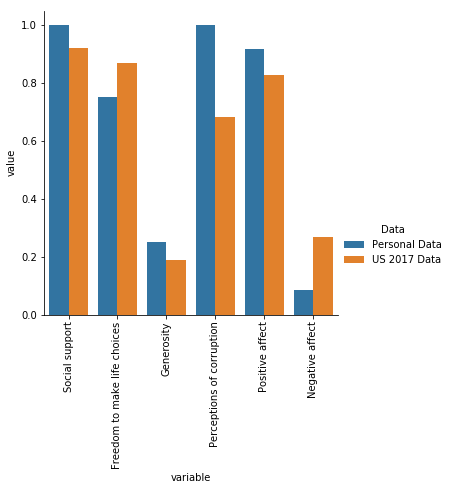

In [245]:
fig = plt.figure()
sns.catplot(x="variable",y="value",hue="Data",data=melted,kind='bar').set_xticklabels(rotation=90)
plt.show()